# Pair Programming Regresión Lineal Intro

In [23]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [24]:
df= pd.read_csv ('data/df_encoding.csv', index_col=0)

In [25]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0.472641,-0.80,-0.228803,-0.5,1,1,0,0,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,0.018101,-0.84,0.503117,0.0,0,0,1,0,0,1,0


In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_Sklearn', 'age_robust', 'bmi_robust', 'children_robust',
       'smoker_map', 'sex_female', 'sex_male', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

Vamos a limpiar todas las columnas originales para dejar solo las que resultaron de los pairs anteriores para poder hacer las predicciones. Quitamos también region y sex porque vimos que no influían mucho en nuestra respuesta.

In [27]:
df.drop (['age','bmi', 'sex', 'smoker', 'children', 'charges', 'region', 'sex_female', 'sex_male', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

In [28]:
df.head(1)

,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map
0,0.472641,-0.8,-0.228803,-0.5,1


In [29]:
X = df.drop("charges_Sklearn", axis = 1) #Separamos nuestros datos
y = df["charges_Sklearn"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Creamos el train/test

In [31]:
lr = LinearRegression(n_jobs=-1) #Iniciamos la regresión lineal

In [32]:
lr.fit(x_train, y_train) #Fiteamos. Es decir, pasamos los datos de entrenamiento para que  aprenda el algoritmo.

LinearRegression(n_jobs=-1)

In [33]:
y_predict_train = lr.predict(x_train) #Hacemos  las predicciones para los datos de entrenamiento
y_predict_test = lr.predict(x_test) #Hacemos las predicciones para  los  datos de test

In [37]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
331,0.615816,0.674191,Train
409,0.277641,0.316840,Train
76,0.027139,0.084873,Train
866,0.064706,0.081005,Train
138,0.602735,0.707855,Train


In [38]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted'] 
resultados.head() #Vemos los residuos, que son la diferencia entre los valores observados y los valores  que predice el modelo

,Real,Predicted,Set,residuos
331,0.615816,0.674191,Train,-0.058375
409,0.277641,0.316840,Train,-0.039199
76,0.027139,0.084873,Train,-0.057735
866,0.064706,0.081005,Train,-0.016299
138,0.602735,0.707855,Train,-0.105119


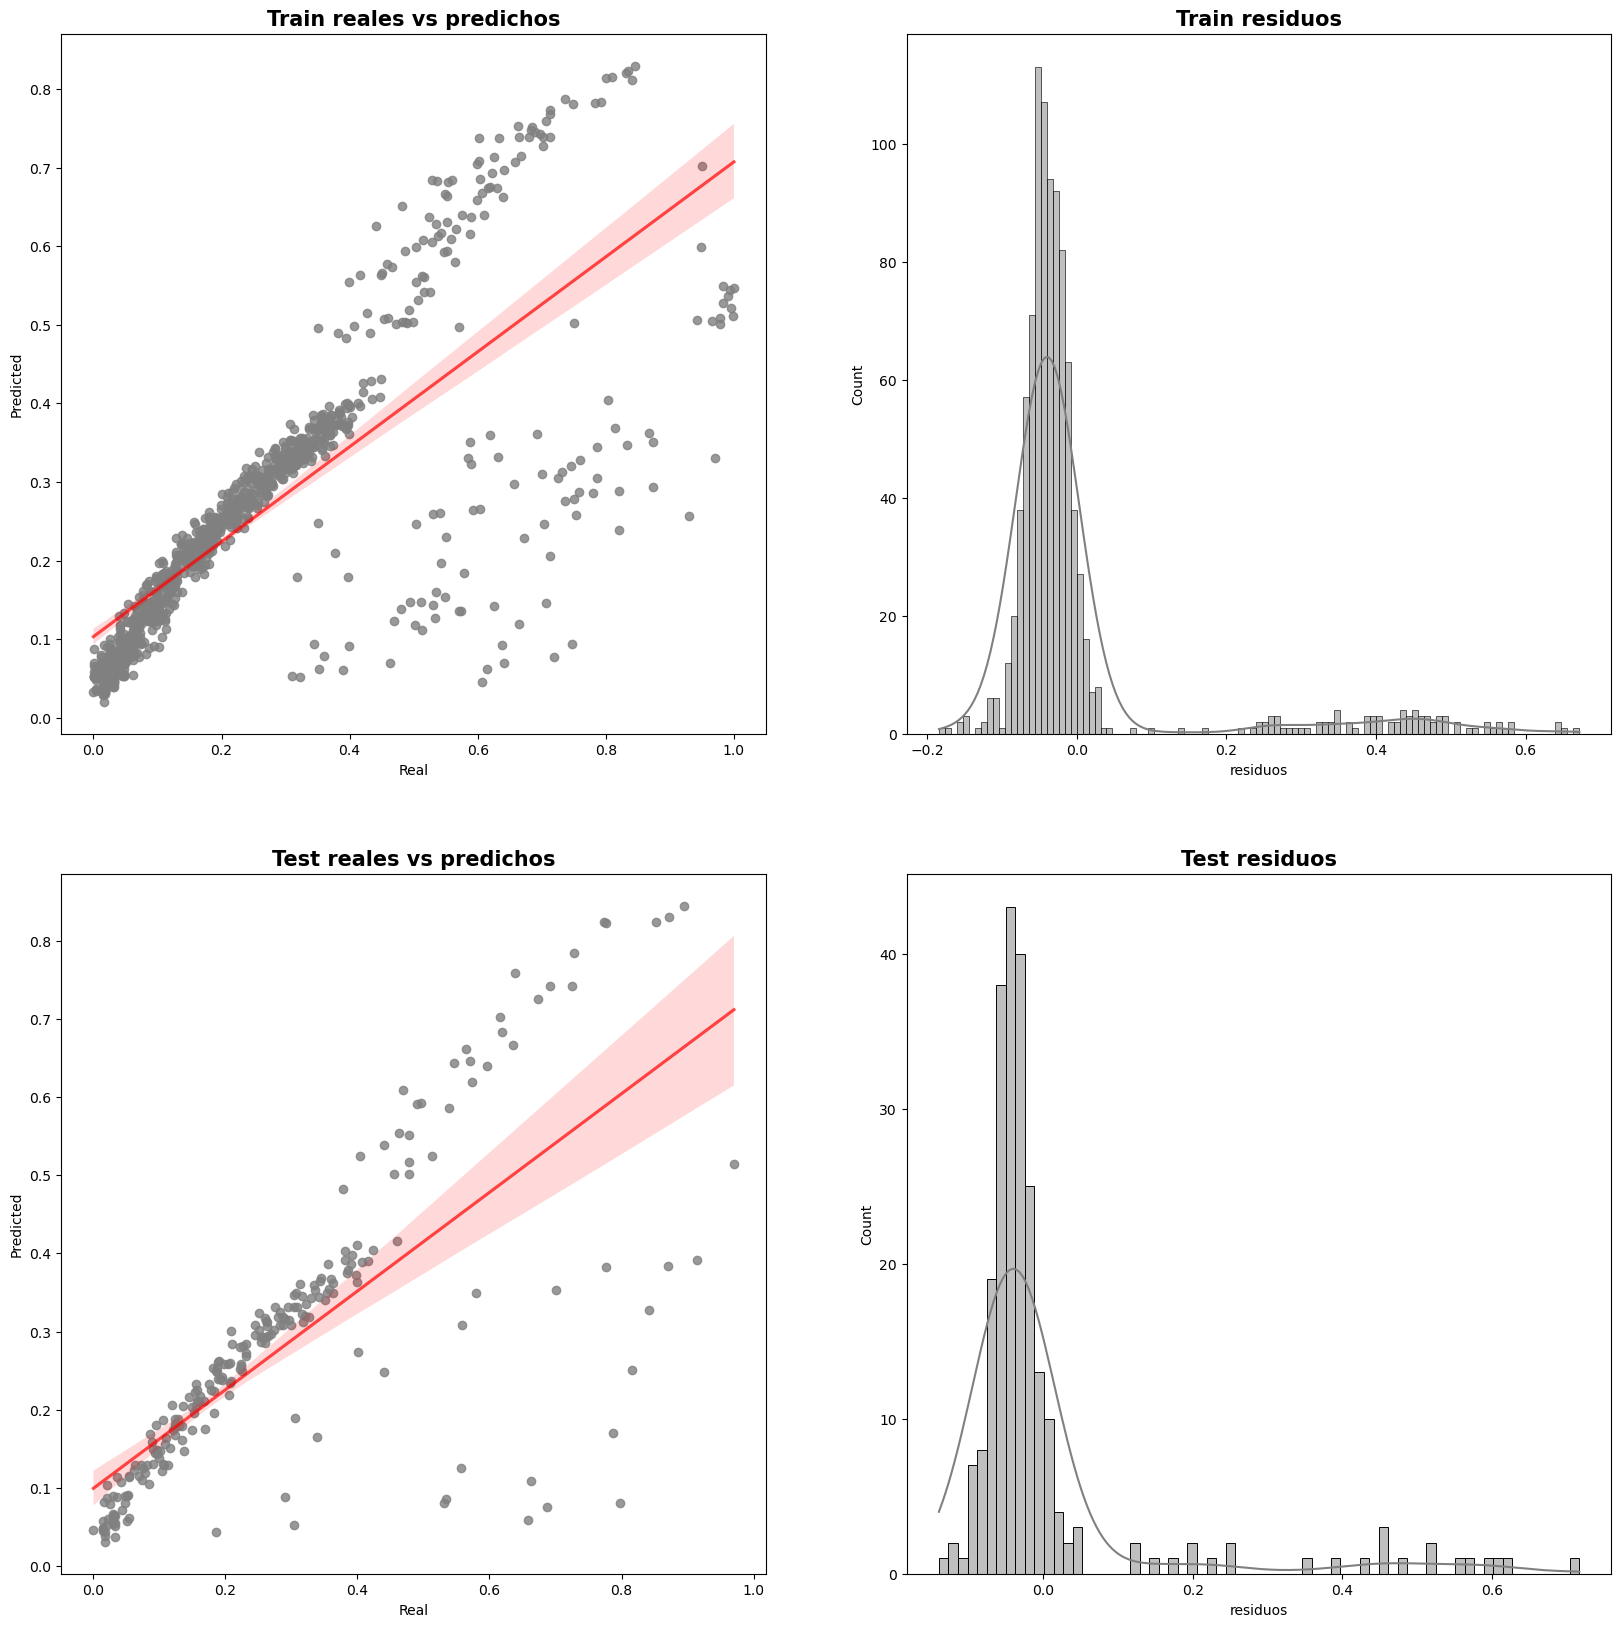

In [36]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

El modelo da resultados erroneos porque esta infrajustado (underfitting) y tendriamos que aumentar el número de variables predictoras o usar otras.

Los residuos también ha salido mal ajustados porque no tienen una distribución normal.

In [39]:
df.to_csv ('data/df_para_metricas.csv')

Guardamos este csv para poder usarlo en el siguiente ejercicio.
